In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']


In [2]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
list(G.nodes())

['Alice', 'Bob', 'Chuck']

In [3]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

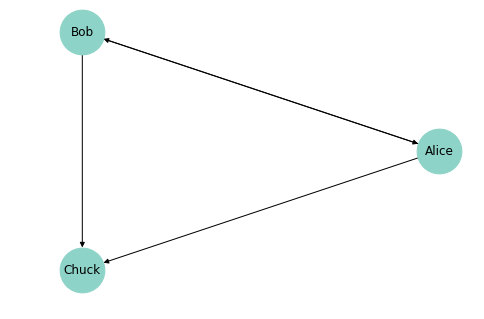

In [4]:
nx.draw_circular(G, node_color=COLORS[0], node_size=2000, with_labels=True)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{('Albany', 'Boston'): Text(-72.5, 42.5, '3'),
 ('Albany', 'NYC'): Text(-74.0, 42.0, '4'),
 ('Boston', 'NYC'): Text(-72.5, 41.5, '4'),
 ('NYC', 'Philly'): Text(-74.5, 40.5, '2')}

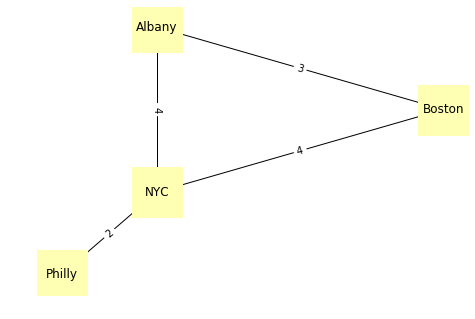

In [5]:
positions = dict(Albany=(-74, 43), Boston=(-71, 42), NYC=(-74, 41), Philly=(-75, 40))
G = nx.Graph()
G.add_nodes_from(positions)
drive_times = {('Albany', 'Boston'):3, ('Albany', 'NYC'):4, ('Boston', 'NYC'):4, ('NYC', 'Philly'):2}
G.add_edges_from(drive_times)
nx.draw(G, positions, node_color=COLORS[1], node_shape='s', node_size=2500, with_labels=True)
nx.draw_networkx_edge_labels(G, positions, edge_labels=drive_times)

In [6]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u, v

def make_complete_graph(n):
    G=nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

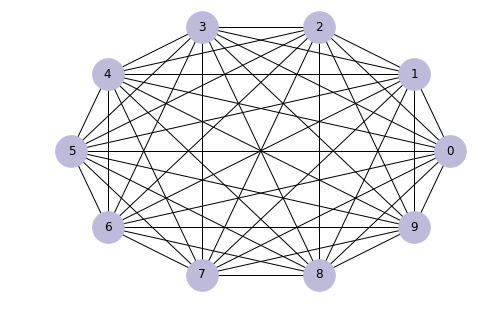

In [7]:
complete = make_complete_graph(10)
nx.draw_circular(complete, node_color=COLORS[2], node_size=1000, with_labels=True)

In [8]:
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)
is_connected(complete)

True

In [11]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge
def flip(p):
    return np.random.random() < p

def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

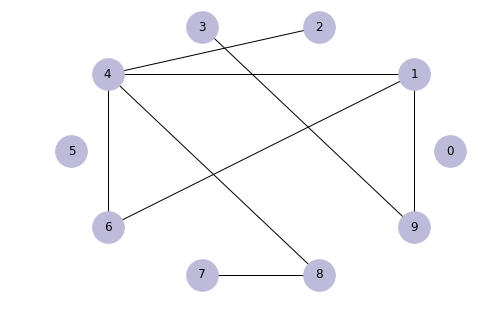

In [12]:
random_graph = make_random_graph(10, 0.3)
nx.draw_circular(random_graph, node_color=COLORS[2], node_size=1000, with_labels=True)

In [13]:
is_connected(random_graph)

False

In [14]:
def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p)) for i in range(iters)]
    return np.mean(tf)
prob_connected(10, 0.23, 10000)

0.3394

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.77, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.73, 0.99, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.24, 0.97, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


<function matplotlib.pyplot.show(*args, **kw)>

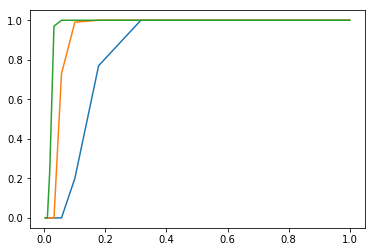

In [15]:
n = 30
ps = np.logspace(-2.5, 0, 11)
ys = [prob_connected(n, p) for p in ps]
print(ys)
plt.plot(ps, ys)
plt.show

ys1 = [prob_connected(100, p) for p in ps]
print(ys1)
plt.plot(ps, ys1)
plt.show

ys2 = [prob_connected(300, p) for p in ps]
print(ys2)
plt.plot(ps, ys2)
plt.show

In [16]:
eggs = (x*2 for x in [1, 2, 3, 4, 5])
print(list(eggs))

[2, 4, 6, 8, 10]


In [17]:
eggs = [x*2 for x in [1, 2, 3, 4, 5]]
eggs

[2, 4, 6, 8, 10]